In [196]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

In [396]:
#Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape , test.shape 

((1460, 81), (1459, 80))

In [193]:
#EDA
train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
195,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,0.598513
143,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,0.600158
1328,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,0.601299
126,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,0.597723
997,20,RL,NaN,11717,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0.599658
833,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0.599128
1163,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,0.596851
482,70,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,0.598738
207,20,RL,NaN,12493,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,4,2008,WD,Normal,0.598239
149,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,0.597145


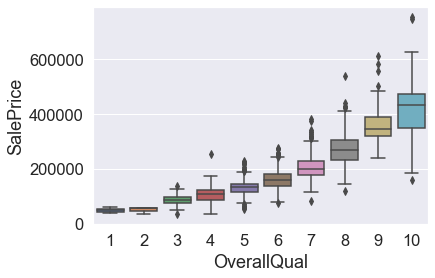

In [397]:
#Examine Overall Quality
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=train)

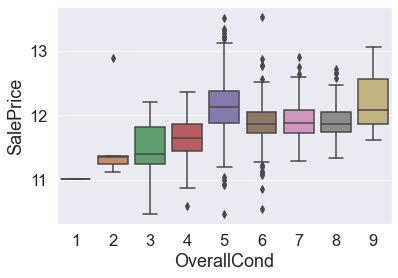

In [428]:
# Overall Condition
ax = sns.boxplot(x="OverallCond", y="SalePrice", data=train)

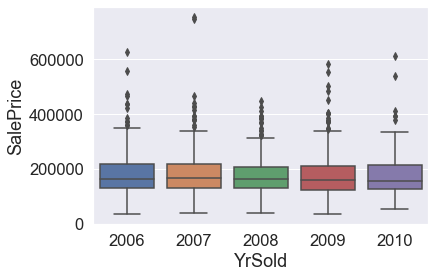

In [399]:
#Year Sold
ax = sns.boxplot(x="YrSold", y="SalePrice", data=train)

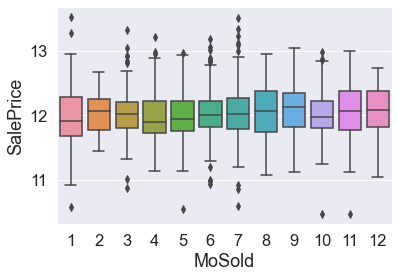

In [387]:
ax = sns.boxplot(x="MoSold", y="SalePrice", data=train)
#It looks like there is very little pricing seasonality

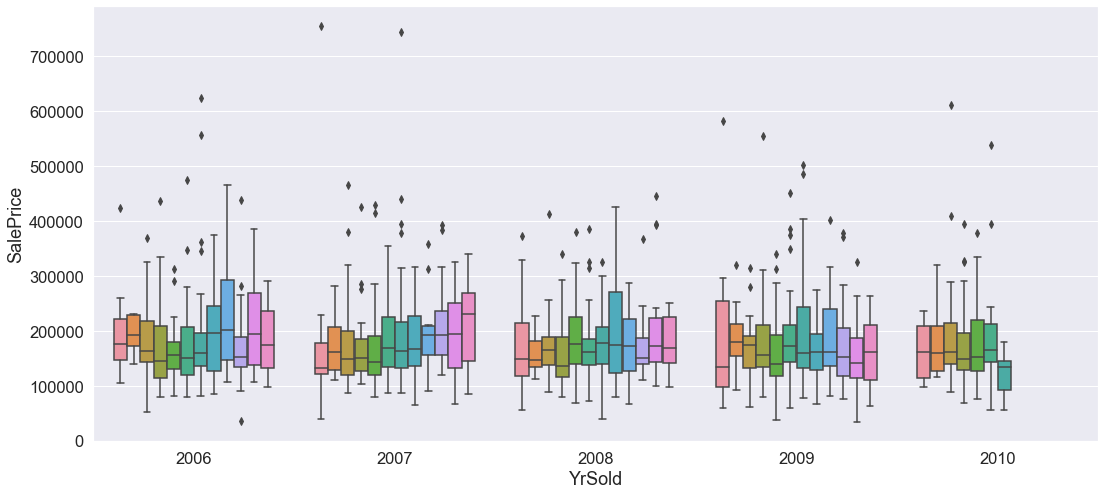

In [401]:
#Month Sold
plt.figure(figsize=(18,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue="MoSold", data=train)
ax.legend_.remove()
#Aside from prices diving in December 2010, there is surprisingly little seasonality in Sale Prices

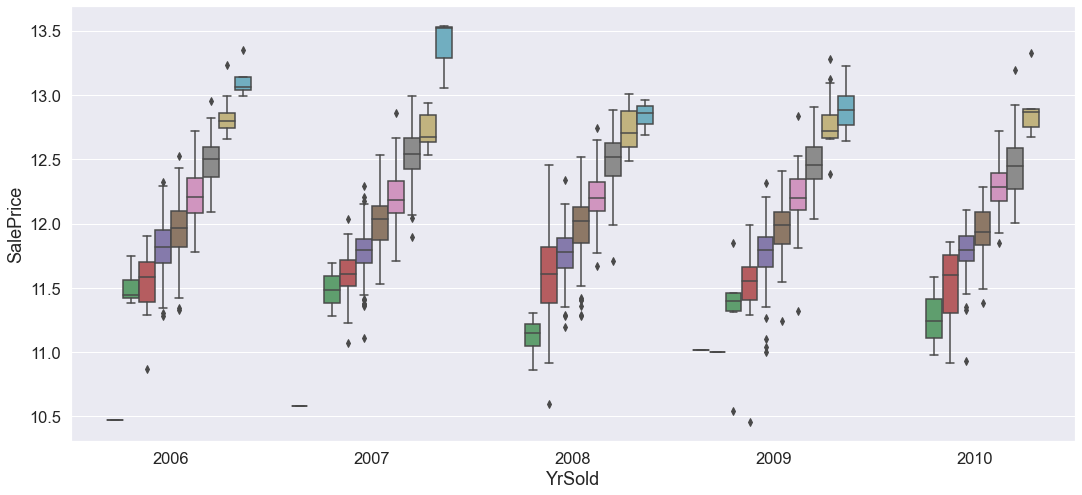

In [395]:
#Did houses of the same quality get priced differently throughout the years?
plt.figure(figsize=(18,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue="OverallQual", data=train)
ax.legend_.remove()

<AxesSubplot:>

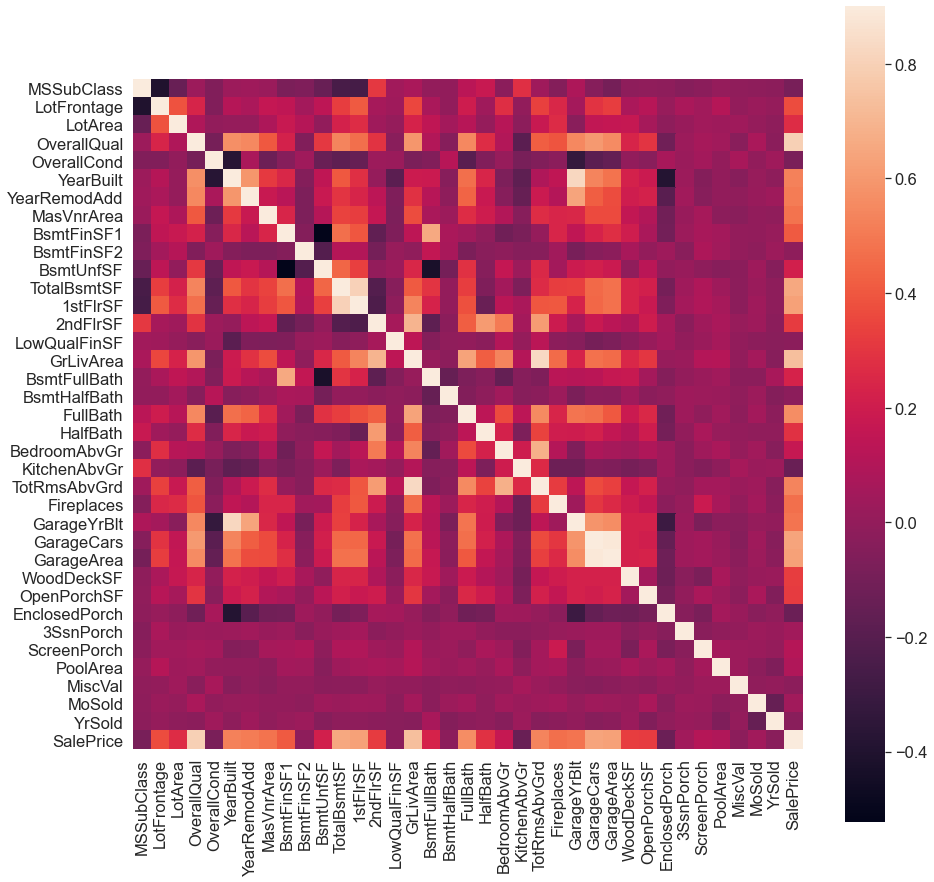

In [408]:
#heatmap to get a sense of correlations
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), vmax=0.9, square=True)

- GarageCars seems perfectly correlated with GarageArea, we can drop GarageCars
- YearBuilt is highly correlated with GarageYrBuilt, which is also correlated with YearRemodAdd
       -we can drop GarageYrBuilt
- GrLivArea is highly correlated with TotRmsAbvGrd, we can drop TotRmsAbvGrd
- TotalBsmtSF is highly correlated with 1stFlSF
- BsmtFinSF1 is correlated with BsmtFullBath

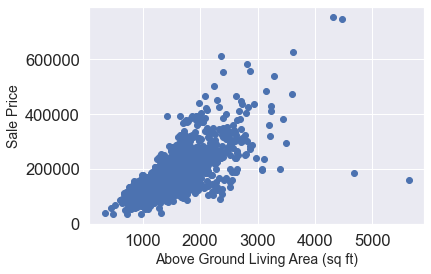

In [404]:
#Data Cleaning

#Plot sale price against GrLivAreab
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Above Ground Living Area (sq ft)', fontsize=14)
plt.show()

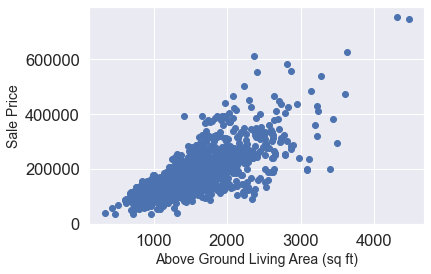

In [405]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Above Ground Living Area (sq ft)', fontsize=14)
plt.show()

In [406]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [407]:
#Remove 'Id' from the train and test sets
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape , test.shape

((1458, 80), (1459, 79))

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

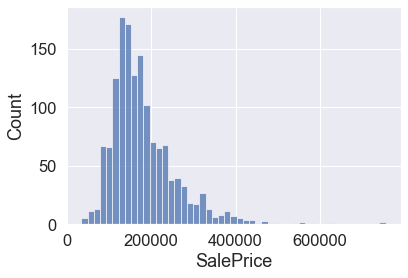

In [409]:
#Plot sale price
sns.histplot(train['SalePrice'])

#The plot shows a right skew- we will apply a log transformation to normalize the distribution

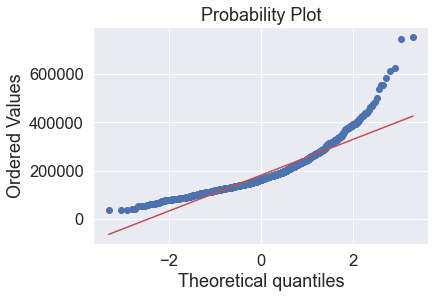

In [410]:
#QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

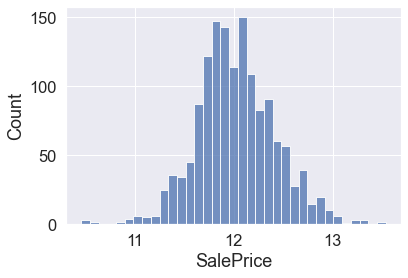

In [411]:
#Apply log transformation to sale price
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.histplot(train['SalePrice'])

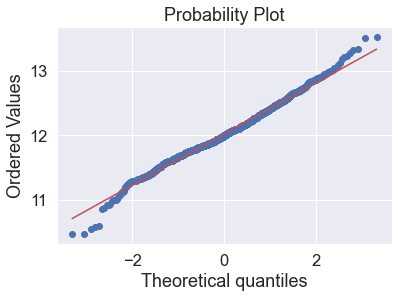

In [412]:
#QQ-plot after log transformation
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [413]:
#Create a combined dataset
combined = pd.concat([train,test], axis=0, sort=False)
combined.drop(['SalePrice'], axis=1, inplace=True)

#Drop redundant columns (as determined by correlation heatmap)
combined = combined.drop(columns=['GarageCars','GarageYrBlt','TotRmsAbvGrd'])
combined.shape

(2917, 76)

In [414]:
#Missing values
combined_na = (combined.isnull().sum() / len(combined)).sort_values(ascending=False)

na_ratios = pd.DataFrame({'Ratio of Missing Values' :combined_na})

#Show all columns that contain missing values
na_ratios[na_ratios['Ratio of Missing Values']>0]

,Ratio of Missing Values
PoolQC,0.996915
MiscFeature,0.964004
Alley,0.932122
Fence,0.804251
FireplaceQu,0.486802
LotFrontage,0.166610
GarageQual,0.054508
GarageCond,0.054508
GarageFinish,0.054508
GarageType,0.053822


In [415]:
#Fill NAs as "None" where appropriate based on documentation
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType']

combined[none_cols] = combined[none_cols].fillna('None')

#Fill zeros for numerical NAs
zero_cols = ['GarageArea',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'MasVnrArea']

combined[zero_cols]=combined[zero_cols].fillna(0)

In [416]:
#Lot Frontage: does this correlate to Lot Area? It the correlation is high, we will drop LotFrontage
from scipy.stats import pearsonr
lot_compare = combined[combined['LotFrontage'].notna()]

corr, _ = pearsonr(lot_compare['LotFrontage'], lot_compare['LotArea'])
print('Pearsons correlation of lot area and lot frontage: %.3f' % corr)

Pearsons correlation of lot area and lot frontage: 0.469


In [417]:
#Impute median neighhborhood LotFrontage instead of dropping it
combined['LotFrontage'] = combined.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
combined['LotFrontage'].isnull().sum()

0

In [418]:
#Impute mode for categorical missing values
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode()[0])
combined['Electrical'] = combined['Electrical'].fillna(combined['Electrical'].mode()[0])
combined['KitchenQual'] = combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])
combined['Exterior1st'] = combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
combined['Exterior2nd'] = combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])
combined['SaleType'] = combined['SaleType'].fillna(combined['SaleType'].mode()[0])
combined['Functional'] = combined['Functional'].fillna(combined['Functional'].mode()[0])

In [419]:
#Utilities
combined['Utilities'].value_counts()
train['Utilities'].value_counts()
#All values are the same except for one from the train set, so we will drop this variable
combined = combined.drop(['Utilities'], axis=1)

combined.isnull().sum().sum()

0

Text(0.5, 1.0, 'Features Correlating with Sale Price')

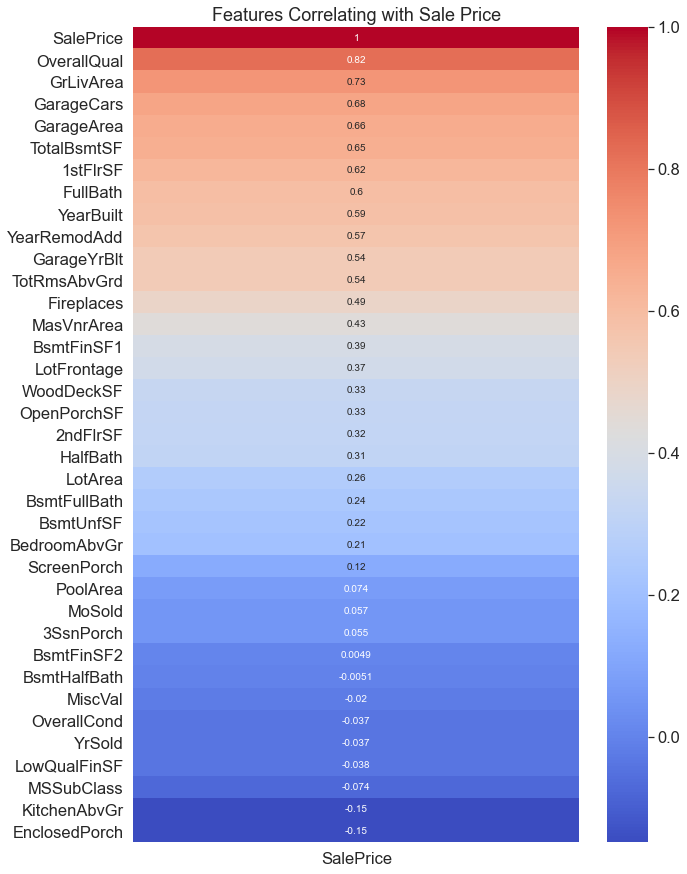

In [423]:
#Heatmap of variables with the highest correlation to log sale price
plt.figure(figsize=(10,15))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm').set_title('Features Correlating with Sale Price', fontdict={'fontsize':18})

In [432]:
#Converting numeric variables that are actually categorical

#Converting MSSubClass, Year Sold, and Month Sold
combined['MSSubClass']=combined['MSSubClass'].astype("str")
combined['YrSold']=combined['YrSold'].astype("str")
combined['MoSold']=combined['MoSold'].astype("str")

combined.MSSubClass.dtype

dtype('O')

In [435]:
combined.YearBuilt.dtype

dtype('int64')

In [438]:
#Feature Engineering

#house age
combined['HouseAge']= pd.to_numeric(combined['YrSold'])-combined['YearBuilt']

#years since remodel
combined['YrsSinceRemod']= pd.to_numeric(combined['YrSold'])-combined['YearRemodAdd']

#total bathrooms
combined['Bathrooms']= combined['FullBath']+(combined['HalfBath']*.5)+combined['BsmtFullBath']+(combined['BsmtHalfBath']*.5)

# total above ground sq footage (note basements are typically not allowed to be included in real estate sq footage)
combined['AboveGrSF']= combined['1stFlrSF']+combined['2ndFlrSF']

#total porch sq ft
combined['PorchSF']= combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch']

#total basement square feet
combined['BsmtSF']= combined['BsmtFinSF1']+combined['BsmtFinSF2']

In [442]:
#Drop columns used in calculating new columns
combined = combined.drop(columns=['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath',
                                 '1stFlrSF','1stFlrSF',
                                 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                                 'YearBuilt','YearRemodAdd',
                                 'BsmtFinSF1','BsmtFinSF2'])

In [449]:
#Identify variables with high skew levels
skewed = combined.skew(axis=0).sort_values(ascending=False)

high_skew = skewed[skewed > 0.5]
high_skew

LotArea         13.116240
MiscVal          5.214687
KitchenAbvGr     4.302763
MasVnrArea       2.623068
PorchSF          2.245655
WoodDeckSF       1.845741
MSSubClass       1.375838
LotFrontage      1.103606
GrLivArea        1.069300
AboveGrSF        1.046594
BsmtUnfSF        0.920161
2ndFlrSF         0.861999
BsmtSF           0.796780
Fireplaces       0.725651
TotalBsmtSF      0.672097
HouseAge         0.598323
OverallCond      0.569607
dtype: float64

In [451]:
#drop LowQualFinSF(vast majority of values are zero), PoolArea(this is somewhat redundant with PoolQuality)
combined = combined.drop(columns=['LowQualFinSF','PoolArea'])
#re-run skew
skewed = combined.skew(axis=0).sort_values(ascending=False)
high_skew = skewed[skewed > 0.5]
high_skew

LotArea         13.116240
MiscVal          5.214687
KitchenAbvGr     4.302763
MasVnrArea       2.623068
PorchSF          2.245655
WoodDeckSF       1.845741
MSSubClass       1.375838
LotFrontage      1.103606
GrLivArea        1.069300
AboveGrSF        1.046594
BsmtUnfSF        0.920161
2ndFlrSF         0.861999
BsmtSF           0.796780
Fireplaces       0.725651
TotalBsmtSF      0.672097
HouseAge         0.598323
OverallCond      0.569607
dtype: float64

In [460]:
#Log transformation of skewed numerical features
for feat in high_skew.index:
    combined[feat] = np.log1p(combined[feat])

In [461]:
# Mapping some ordinal categorical variables that contain information in their ordering set to integers for linear models
combined2 = combined.copy()

combined2 = combined.replace({
    'ExterQual':quality, 'ExterCond':quality,
    'BsmtQual':quality, 'BsmtCond':quality,
    'BsmtExposure':{'Gd':4, 'Av':3, 'Mn':2, 'No':1 , 'NA':0},
    #Basement average rec room coded equivalent to average living quarters
    'BsmtFinType1':{'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':4, 'LwQ':2, 'Unf':1, 'None':0},
    'BsmtFinType2':{'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':4, 'LwQ':2, 'Unf':1, 'None':0},
    'HeatingQC': quality, 'CentralAir': {'No':0, 'Yes':1},
    'KitchenQual': quality,
    'Functional':{'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
    'FireplaceQu' : quality,
    'GarageFinish':{'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    'GarageQual' :quality, 'GarageCond' :quality,
    'PavedDrive' :{'Y':2, 'P':1, 'N':0},
    'PoolQC' : quality,
})
#Dummify remaining categorical variables (non-ordinal)
combined2 = pd.get_dummies(combined2)
combined2.shape

(2917, 242)

In [466]:
#Re-split data into train and test
x_train = combined2[:len(y)]
x_test = combined2[len(y):]

x_train_cat = combined[:len(y_train)]
x_test_cat = combined[len(y_train):]

y = train['SalePrice']

x_train.shape, x_test.shape

((1458, 242), (1459, 242))

In [467]:
#Split train data for training model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size=.30, random_state=0)

In [476]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print("R^2 for train set: %f" %lr.score(x_train, y_train))
print("R^2 for test set: %f" %lr.score(x_test, y_test))

R^2 for train set: 0.941982
R^2 for test set: 0.907038


In [474]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Initial best alpha :", alpha)
#Tuned further
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on train set:", rmse_cv_train(ridge).mean())
print("Ridge RMSE on test set:", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(x_train)
y_test_rdg = ridge.predict(x_test)

Initial best alpha : 10.0
Best alpha : 10.5


NameError: name 'rmse_cv_train' is not defined